# Kaggle - Titanic: Machine Learning from Disaste_2

In [1]:
# 시각화 패키지 matplotlib로 inline 출력,
%matplotlib inline

import pandas as pd
import seaborn as sns

## Load Dataset 데이터 불러오기

In [2]:
# PassengerId를 인덱스(index)로 지정한 뒤, train 변수에 할당
train = pd.read_csv("data/train.csv", index_col="PassengerId")

print(train.shape)

train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 정리 + 기본 분석

#### 1. train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수 구 하기

In [3]:
# 타이타닉의 train데이터에서 Survived 컬럼의 평균
survived_rate = train["Survived"].mean()

# % 로 표현하기 위해 100을 곱함
survived_rate = survived_rate * 100

print(f"생존률 = {survived_rate:.1f}%")
survived_rate

생존률 = 38.4%


38.38383838383838

In [4]:
# 생존자의 총 인원수와 사망자의 총 인원수를 출력, 생존자의 총 인원수(1), 사망자의 인원수(0) 으로 표시
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 2. Survived 컬럼에 들어가 있는 값을 쉬운 표현으로 바꾸기

In [5]:
# 생존, 사망의 표시가 0과 1로 되어 있어서 알기 어려움
train["Survived"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Survived(humanized) 라는 새로운 컬럼을 만들어 0는 Perish(사망), 1은 Survived(생존)으로 표시

In [6]:
# Survived 컬럼이 0을 색인 하고 Survived(humanized) 컬럼에 "Perish" 라는 값을 넣기
train.loc[train["Survived"] == 0, "Survived(humanized)"] = "Perish"

# Survived 컬럼이 1을 색인 하고 Survived(humanized) 컬럼에  "Survived" 라는 값을 넣기
train.loc[train["Survived"] == 1, "Survived(humanized)"] = "Survived"

print(train.shape)

train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


이런 방식도 사용 가능

In [7]:
# Survived 컬럼이 0인 값을 Perish로, 1인 값을 Survived로 대체(replace)
train["Survived(humanized)"] = train["Survived"].replace(0, "Perish").replace(1, "Survived")

print(train.shape)

train[["Survived", "Survived(humanized)"]].head()

(891, 12)


,Survived,Survived(humanized)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


Survived(humanized) 컬럼으로 생존자의 총 인원수와 사망자의 총 인원수를 출력

In [8]:
train["Survived(humanized)"].value_counts()

Perish      549
Survived    342
Name: Survived(humanized), dtype: int64

#### 3. Pclass 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꾸기

Pclass의 1, 2, 3이라는 표현도 직관적으로 바꿈

In [9]:
# pandas의 pivot_table을 활용하여 Pclass별 생존률을 출력
pd.pivot_table(data=train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass(humanized)컬럼을 만들어 1, 2, 3이 아닌 First Class, Business, Economy 라는 값으로 표현

In [10]:
# Pclass 컬럼이 1인 승객을 색인 후 Pclass(humanized) 컬럼에 "First Class"
train.loc[train["Pclass"] == 1, "Pclass(humanized)"] = "First Class"

# Pclass 컬럼이 2인 승객을 색인 후 Pclass(humanized) 컬럼에 "Business"
train.loc[train["Pclass"] == 2, "Pclass(humanized)"] = "Business"

# Pclass 컬럼이 3인 승객을 색인 후 Pclass(humanized) 컬럼에 "Economy"
train.loc[train["Pclass"] == 3, "Pclass(humanized)"] = "Economy"

print(train.shape)

train[["Pclass", "Pclass(humanized)"]].head()

(891, 13)


,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


이런 방식도 사용 가능

In [11]:
train["Pclass(humanized)"] = train["Pclass"].replace(1, "First Class") \
                                            .replace(2, "Business") \
                                            .replace(3, "Economy")

print(train.shape)

train[["Pclass", "Pclass(humanized)"]].head()

(891, 13)


,Pclass,Pclass(humanized)
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


In [12]:
# Pclass별 생존률을 출력
pd.pivot_table(data=train, index="Pclass(humanized)", values="Survived")

,Survived
Pclass(humanized),
Business,0.472826
Economy,0.242363
First Class,0.629630


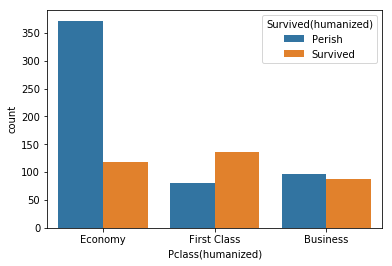

In [13]:
# Pclass별 생존자와 사망자의 차이를 시각화
sns.countplot(data=train, x="Pclass(humanized)", hue="Survived(humanized)")

#### 4. Embarked 컬럼에 들어가 있는 값을 읽기 쉬운 표현으로 바꾸기

Embarked의 C, S, Q라는 표현을 C는 Cherbourg 라는 표현으로, S는 Southampton 이라는 표현으로, 그리고 Q는 Queenstown 이라는 표현으로 바꿈

In [14]:
# Embarked 별 생존률을 출력
pd.pivot_table(data=train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Embarked(humanized)라는 컬럼을 만들어 Cherbourg, Southampton, Queenstown이라는 값을 넣음

In [15]:
# Embarked 컬럼이 S인 승객을 색인 후 Embarked(humanized) 컬럼에 "Southampton"
train.loc[train["Embarked"] == "S", "Embarked(humanized)"] = "Southampton"

# Embarked 컬럼이 C인 승객을 색인 후 Embarked(humanized) 컬럼에 "Cherbourg"
train.loc[train["Embarked"] == "C", "Embarked(humanized)"] = "Cherbourg"

# Embarked 컬럼이 Q인 승객을 색인 후 Embarked(humanized) 컬럼에 "Queenstown"
train.loc[train["Embarked"] == "Q", "Embarked(humanized)"] = "Queenstown"

print(train.shape)

train[["Embarked", "Embarked(humanized)"]].head()

(891, 14)


,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


이런 방식도 사용 가능

In [16]:
train["Embarked(humanized)"] = train["Embarked"].replace("C", "Cherbourg") \
                                                .replace("S", "Southampton") \
                                                .replace("Q", "Queenstown")

print(train.shape)

train[["Embarked", "Embarked(humanized)"]].head()

(891, 14)


,Embarked,Embarked(humanized)
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


In [17]:
# Embarked별 생존률을 출력
pd.pivot_table(data=train, index="Embarked(humanized)", values="Survived")

,Survived
Embarked(humanized),
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


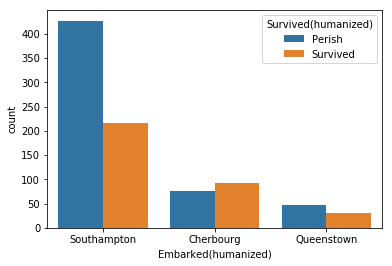

In [18]:
#Embarked별 생존자와 사망자의 차이를 시각화
sns.countplot(data=train, x="Embarked(humanized)", hue="Survived(humanized)")

### 나이(Age) 컬럼 분석

#### 5. 나이(Age) 컬럼에서 다음의 정보를 출력

In [19]:
# 평균
train["Age"].mean()

29.69911764705882

In [20]:
# 최대값
train["Age"].max()

80.0

In [21]:
# 최소값
train["Age"].min()

0.42

In [22]:
# 모든 값 확인
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 6. 객실 등급별 나이(Age) 컬럼의 평균

In [23]:
# Pclass가 1등급인 승객만 색인해서 Pclass1이라는 변수에 할당
pclass1 = train[train["Pclass"] == 1]

pclass1["Age"].mean()

38.233440860215055

In [24]:
# Pclass가 2등급인 승객만 색인해서 Pclass2이라는 변수에 할당
pclass2 = train[train["Pclass"] == 2]

pclass2["Age"].mean()

29.87763005780347

In [25]:
# Pclass가 3등급인 승객만 색인해서 Pclass3이라는 변수에 할당
pclass3 = train[train["Pclass"] == 3]

pclass3["Age"].mean()

25.14061971830986

In [26]:
# groupby 를 사용하면 한번에 출력 가능
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [27]:
# 피벗 테이블로 평균나이 구하기
pd.pivot_table(train, index = ["Pclass(humanized)"], values = "Age")

,Age
Pclass(humanized),
Business,29.877630
Economy,25.140620
First Class,38.233441


In [28]:
# 피벗 테이블로 평균나이 구하기
pd.pivot_table(train, index = ["Pclass"], values = "Age")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


#### 7. 나이를 일정 구역으로 나눠서, 구역마다의 생존률 표시

1. 나이가 15세 미만인 승객.
2. 나이가 15세 이상이고 30세 미만인 승객.
3. 나이가 30세 이상인 승객.

1번, 2번, 3번 구역에 해당하는 승객의 평균 생존률도 표시

In [29]:
# 나이가 15세 미만인 승객을 색인한 뒤, AgeType에 "Young"
train.loc[train["Age"] < 15, "AgeType"] = "Young"

# 나이가 15세 이상 30세 미만인 승객의 AgeType에는 "Medium"
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "AgeType"] = "Medium"

# 나이가 30세 이상인 승객의 AgeType에는 "Old"
train.loc[train["Age"] >= 30, "AgeType"] = "Old"

print(train.shape)

train[["Age", "AgeType"]].head(10)

(891, 15)


,Age,AgeType
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old
6,NaN,NaN
7,54.0,Old
8,2.0,Young
9,27.0,Medium


In [30]:
# groupby 를 이용하여 한번에 출력
train.groupby("AgeType")["Survived"].mean()

AgeType
Medium    0.362745
Old       0.406061
Young     0.576923
Name: Survived, dtype: float64

In [31]:
# 피벗 테이블로 생존률 구하기
pd.pivot_table(data=train, index="AgeType", values="Survived")

,Survived
AgeType,
Medium,0.362745
Old,0.406061
Young,0.576923


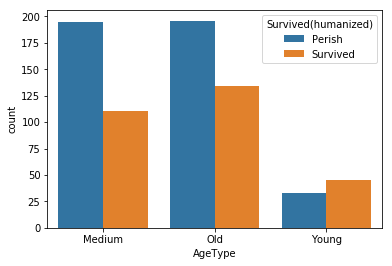

In [32]:
# AgeType별 생존자와 사망자의 차이를 시각화
sns.countplot(data=train, x="AgeType", hue="Survived(humanized)")

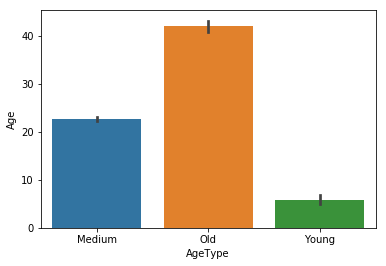

In [33]:
# AgeType별 평균 나이(Age)를 시각화
sns.barplot(data=train, x="AgeType", y="Age")

#### 8. 나이가 비어있는 승객과 비어있지 않은 승객의 생존률 차이

In [34]:
# AgeBlank라는 새로운 컬럼을 만든 뒤, 비어있의면 "Blank"
train.loc[train["Age"].isnull(), "AgeBlank"] = "Blank"

# 비어있지 않다면 "Not Blank"
train.loc[train["Age"].notnull(), "AgeBlank"] = "Not Blank"

print(train.shape)

train[["Age", "AgeBlank"]].head(10)

(891, 16)


,Age,AgeBlank
PassengerId,,
1,22.0,Not Blank
2,38.0,Not Blank
3,26.0,Not Blank
4,35.0,Not Blank
5,35.0,Not Blank
6,NaN,Blank
7,54.0,Not Blank
8,2.0,Not Blank
9,27.0,Not Blank


In [35]:
# groupby 를 이용하여 한번에 출력
train.groupby("AgeBlank")["Survived"].mean()

AgeBlank
Blank        0.293785
Not Blank    0.406162
Name: Survived, dtype: float64

In [36]:
# 피벗 테이블로 출력
pd.pivot_table(data=train, index="AgeBlank", values="Survived")

,Survived
AgeBlank,
Blank,0.293785
Not Blank,0.406162


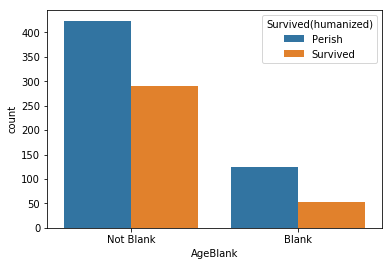

In [37]:
# AgeBlank별 생존자와 사망자의 차이를 시각화
sns.countplot(data=train, x="AgeBlank", hue="Survived(humanized)")

#### 9. Pclass별 나이(Age)의 평균을 구한 뒤 빈 값에 채우기

1. 객실 등급(Pclass)이 1등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값 채움
2. 객실 등급(Pclass)이 2등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값 채움 
3. 객실 등급(Pclass)이 3등급인 승객의 평균 나이를 구해서, 해당 승객 중 나이(Age)컬럼값이 비어있는 승객을 찾아 빈 나이 값 채움 

In [38]:
# groupby 로 평균 한번에 구하기
mean_age_by_pclass = train.groupby("Pclass")["Age"].mean()
mean_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [39]:
# 원본 유지를 위하여 컬럼 복사
train["Age(fill)"] = train["Age"]

print(train.shape)

train[["Pclass","Age", "Age(fill)"]].head(30)

(891, 17)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.0
2,1,38.0,38.0
3,3,26.0,26.0
4,1,35.0,35.0
5,3,35.0,35.0
6,3,NaN,NaN
7,1,54.0,54.0
8,3,2.0,2.0
9,3,27.0,27.0


In [40]:
# 객실 등급(Pclass)이 1등급이고 나이(Age) 컬럼값이 비어있는 승객을 색인하고 Age(fill)에 평균 1등급 승객의 평균 나이를 넣기
train.loc[(train["Pclass"] == 1) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[1]

# 객실 등급(Pclass)이 2등급이고 나이(Age) 컬럼값이 비어있는 승객을 색인하고 Age(fill)에 평균 2등급 승객의 평균 나이를 넣기
train.loc[(train["Pclass"] == 2) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[2]

# 객실 등급(Pclass)이 3등급이고 나이(Age) 컬럼값이 비어있는 승객을 색인하고 Age(fill)에 평균 3등급 승객의 평균 나이를 넣기
train.loc[(train["Pclass"] == 3) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[3]

print(train.shape)

train[["Pclass","Age", "Age(fill)"]].head(30)

(891, 17)


,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
6,3,NaN,25.14062
7,1,54.0,54.00000
8,3,2.0,2.00000
9,3,27.0,27.00000


이런 방식도 사용 가능

In [41]:
# 피벗 테이블을 이용하여 평균 확인
pd.pivot_table(train, index = ["Pclass"], values = "Age")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [42]:
## 원본 유지를 위하여 컬럼 복사
train["Age(fill)"] = train["Age"]

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived(humanized),Pclass(humanized),Embarked(humanized),AgeType,AgeBlank,Age(fill)
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perish,Economy,Southampton,Medium,Not Blank,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,Old,Not Blank,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy,Southampton,Medium,Not Blank,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,Old,Not Blank,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perish,Economy,Southampton,Old,Not Blank,35.0


In [43]:
# 평균 값을 직접 집어 넣어서 빈칸 채우기
train.loc[(train["Age(fill)"].isnull()) & (train["Pclass"]== 1), "Age(fill)"] = 38.233441
train.loc[(train["Age(fill)"].isnull()) & (train["Pclass"]== 2), "Age(fill)"] = 29.877630
train.loc[(train["Age(fill)"].isnull()) & (train["Pclass"]== 3), "Age(fill)"] = 25.140620
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived(humanized),Pclass(humanized),Embarked(humanized),AgeType,AgeBlank,Age(fill)
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perish,Economy,Southampton,Medium,Not Blank,22.00000
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,Old,Not Blank,38.00000
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Economy,Southampton,Medium,Not Blank,26.00000
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,Old,Not Blank,35.00000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perish,Economy,Southampton,Old,Not Blank,35.00000
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Perish,Economy,Queenstown,NaN,Blank,25.14062
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Perish,First Class,Southampton,Old,Not Blank,54.00000
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Perish,Economy,Southampton,Young,Not Blank,2.00000
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Survived,Economy,Southampton,Medium,Not Blank,27.00000


In [44]:
train[["Pclass", "Age", "Age(fill)"]].head(20)

,Pclass,Age,Age(fill)
PassengerId,,,
1,3,22.0,22.00000
2,1,38.0,38.00000
3,3,26.0,26.00000
4,1,35.0,35.00000
5,3,35.0,35.00000
6,3,NaN,25.14062
7,1,54.0,54.00000
8,3,2.0,2.00000
9,3,27.0,27.00000


### SibSp, Parch 컬럼 분석

#### 10. 타이타닉호에 동승한 형제, 자매, 배우자(SibSp)도 없고, 부모와 자식(Parch)도 없는 사람을 구하기

싱글(Single)이라고 가정할 것이며 싱글(Single)인 사람과 그렇지 않은 사람간의 생존률의 차이도 확인, 시각화 할 것

In [45]:
# SibSp가 0이고 Parch가 0이면 True, 아니면 False 이며 이것을 Single 컬럼에 표시
train["Single"]=(train["SibSp"]== 0) & (train["Parch"]== 0)

print(train.shape)

train[["SibSp", "Parch", "Single"]].head()

(891, 18)


,SibSp,Parch,Single
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True


In [46]:
# 피벗 테이블을 이용하여 Single 여부에 따른 생존률을 출력
pd.pivot_table(train, index = ["Single"], values = "Survived")

,Survived
Single,
False,0.505650
True,0.303538


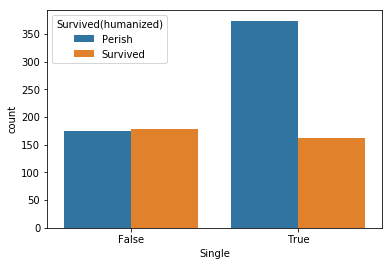

In [47]:
# 시각화
sns.countplot(data=train, x="Single", hue="Survived(humanized)")

#### 11. SibSp 컬럼과  Parch 컬럼을 활용하여 가족 수(FamilySize)라는 새로운 컬럼 생성

가족 수(FamilySize) 컬럼은 언제나 SibSp 컬럼과 Parch 컬럼을 더한 값에서 하나가 더 많아야 함

가족 수 별 생존률의 차이를 구하고 시각화

In [48]:
# SibSp에 Parch를 더하고 ) 컬럼을 더해하고 나 자신을 포함하기 위해서 +1 한 (FamilySize) 컬럼 생성
train["FamilySize"]=(train["SibSp"]) + (train["Parch"]) + 1

print(train.shape)

train[["SibSp", "Parch", "FamilySize"]].head(10)

(891, 19)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [49]:
# 피벗 테이블로 생존률 출력
pd.pivot_table(train, index = ["FamilySize"], values = "Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


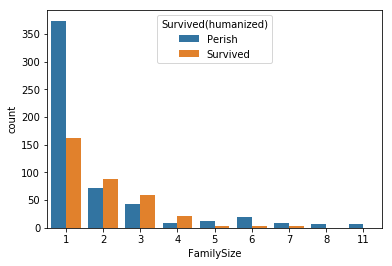

In [50]:
# 시각화
sns.countplot(data=train, x="FamilySize", hue="Survived(humanized)")

### 12. 가족 수(FamilySize) 컬럼의 구역 나누기
경우의 수가 너무 많아서(가족 수가 1명일 때 ~ 11명일 때) 세 구역으로 나눔

1. 싱글(Single)** - 동승한 가족이 아무도 없고, 나 혼자 탑승한 경우
2. 핵가족(Nuclear)** - 동승한 가족이 나 자신을 포함해 2명 이상 5명 미만인 경우
3. 대가족(Big)** - 동승한 가족이 나 자신을 포함 5명 이상인 경우

가족 형태(FamilyType) 별 생존률의 차이도 구하고 시각화

In [51]:
# 가족 수(FamilSize)가 1인 승객을 가져와서, FamilyType 컬럼에 "Single"
train.loc[train["FamilySize"] < 2, "FamilyType"] = "Single"

# 가족 수(FamilSize)가 2 이상 5 미만인 승객을 가져와서, FamilyType 컬럼에 "Nuclear" 이라는 값
train.loc[(train["FamilySize"] >= 2) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수(FamilSize)가 5 이상인 승객을 가져와서, FamilyType 컬럼에 "Big" 이라는 값
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

print(train.shape)

train[["FamilySize", "FamilyType"]].head(10)

(891, 20)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


In [52]:
# 비벗 테이블로 생존률
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


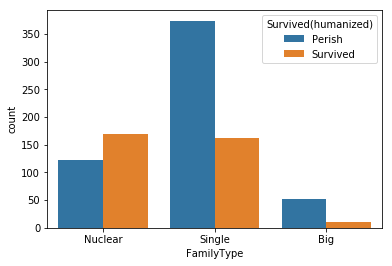

In [53]:
# 시각화
sns.countplot(data=train, x="FamilyType", hue="Survived(humanized)")

## Test 데이터 가공

In [72]:
test = pd.read_csv("data/test.csv")

In [73]:
test["Age(fill)"] = test["Age"]

In [75]:
test.loc[(test["Pclass"] == 1) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[1]
test.loc[(test["Pclass"] == 2) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[2]
test.loc[(test["Pclass"] == 3) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass.loc[3]

test.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age(fill)
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.500000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.000000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.000000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.000000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.000000
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,14.000000
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,30.000000
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,26.000000
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,18.000000
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,21.000000


In [76]:
test["FamilySize"]=(test["SibSp"]) + (test["Parch"]) + 1

print(test.shape)

test[["SibSp", "Parch", "FamilySize"]].head(10)

(418, 13)


,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3
5,0,0,1
6,0,0,1
7,1,1,3
8,0,0,1
9,2,0,3


In [77]:
train["Sex_encode"]=train["Sex"].replace("male",0).replace("female",1)
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [78]:
test["Sex_encode"]=test["Sex"].replace("male",0).replace("female",1)
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


In [79]:
train["Fare"]=train["Fare"].fillna(0)

train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Survived(humanized),Pclass(humanized),Embarked(humanized),AgeType,AgeBlank,Age(fill),Single,FamilySize,FamilyType,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [80]:
test["Fare"]=test["Fare"].fillna(0)

test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age(fill),FamilySize,Sex_encode


## Train 학습

In [81]:
# feature 지정
feature_names=["Pclass", "Sex_encode", "Fare", "Age(fill)"]
feature_names

['Pclass', 'Sex_encode', 'Fare', 'Age(fill)']

In [82]:
x = train[feature_names]
x.head()

,Pclass,Sex_encode,Fare,Age(fill)
PassengerId,,,,
1,3,0,7.2500,22.0
2,1,1,71.2833,38.0
3,3,1,7.9250,26.0
4,1,1,53.1000,35.0
5,3,0,8.0500,35.0


In [83]:
label_names = "Survived"

In [84]:
y = train[label_names]
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### 1. Use Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### fit 으로 train 하고 predict로 test

In [86]:
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2. predict 예측

In [87]:
x_test=test[feature_names]

x_test.head()

,Pclass,Sex_encode,Fare,Age(fill)
0,3,0,7.8292,34.5
1,3,1,7.0000,47.0
2,2,0,9.6875,62.0
3,3,0,8.6625,27.0
4,3,1,12.2875,22.0


In [90]:
prediction_list= model.predict(x_test)

prediction_list[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

## Submit 제출

In [91]:
submit=pd.read_csv("data/gender_submission.csv")

submit["Survived"] = prediction_list

submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
submit.to_csv("decision-tree.csv", index = False)